In [1]:
#OLS model and VIF factor

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.model_selection import train_test_split , RandomizedSearchCV , cross_val_score

from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

%matplotlib inline

In [2]:
path = r"C:\Users\MANISH SHARMA\Desktop\datasets\kaggle\house-prices-advanced-regression-techniques"
df = pd.read_csv(path + "\\train.csv")  # train and test
df1 = pd.read_csv(path + "\\test.csv")
sub = pd.read_csv(path + "\\sample_submission.csv")

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
#check nan values
train_null_values = pd.DataFrame({
    "Null_Values" : df.isnull().sum(),
    "Percentage" : 100*df.isnull().sum() / df.shape[0],
    "type":df.dtypes
})
train_null_values = train_null_values.sort_values(by="Percentage", ascending = False).head(20)
train_null_values

,Null_Values,Percentage,type
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageYrBlt,81,5.547945,float64
GarageCond,81,5.547945,object
GarageType,81,5.547945,object
GarageFinish,81,5.547945,object


In [4]:
#check nan values test
test_null_values = pd.DataFrame({
    "Null_Values" : df1.isnull().sum(),
    "Percentage" : 100*df1.isnull().sum() / df.shape[0] ,
    "Type" : df1.dtypes
})
test_null_values = test_null_values.sort_values(by="Percentage", ascending = False).head(33)

test_null_values

,Null_Values,Percentage,Type
PoolQC,1456,99.726027,object
MiscFeature,1408,96.438356,object
Alley,1352,92.602740,object
Fence,1169,80.068493,object
FireplaceQu,730,50.000000,object
LotFrontage,227,15.547945,float64
GarageYrBlt,78,5.342466,float64
GarageQual,78,5.342466,object
GarageFinish,78,5.342466,object
GarageCond,78,5.342466,object


In [5]:
# going to drop top 6 features from train data and top 6 from test data
train_null_values , test_null_values

(              Null_Values  Percentage     type
 PoolQC               1453   99.520548   object
 MiscFeature          1406   96.301370   object
 Alley                1369   93.767123   object
 Fence                1179   80.753425   object
 FireplaceQu           690   47.260274   object
 LotFrontage           259   17.739726  float64
 GarageYrBlt            81    5.547945  float64
 GarageCond             81    5.547945   object
 GarageType             81    5.547945   object
 GarageFinish           81    5.547945   object
 GarageQual             81    5.547945   object
 BsmtFinType2           38    2.602740   object
 BsmtExposure           38    2.602740   object
 BsmtQual               37    2.534247   object
 BsmtCond               37    2.534247   object
 BsmtFinType1           37    2.534247   object
 MasVnrArea              8    0.547945  float64
 MasVnrType              8    0.547945   object
 Electrical              1    0.068493   object
 Id                      0    0.000000  

In [6]:
## Drop features

#train data
main_df = df.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","LotFrontage"] , axis =1)
#test data
main_df1 = df1.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","LotFrontage"] , axis =1)
main_df   #train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [8]:
main_df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
main_df.isna().sum().sum()

609

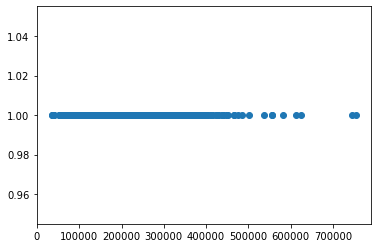

In [11]:
plt.scatter(main_df["SalePrice"] , np.ones_like(main_df["SalePrice"]))

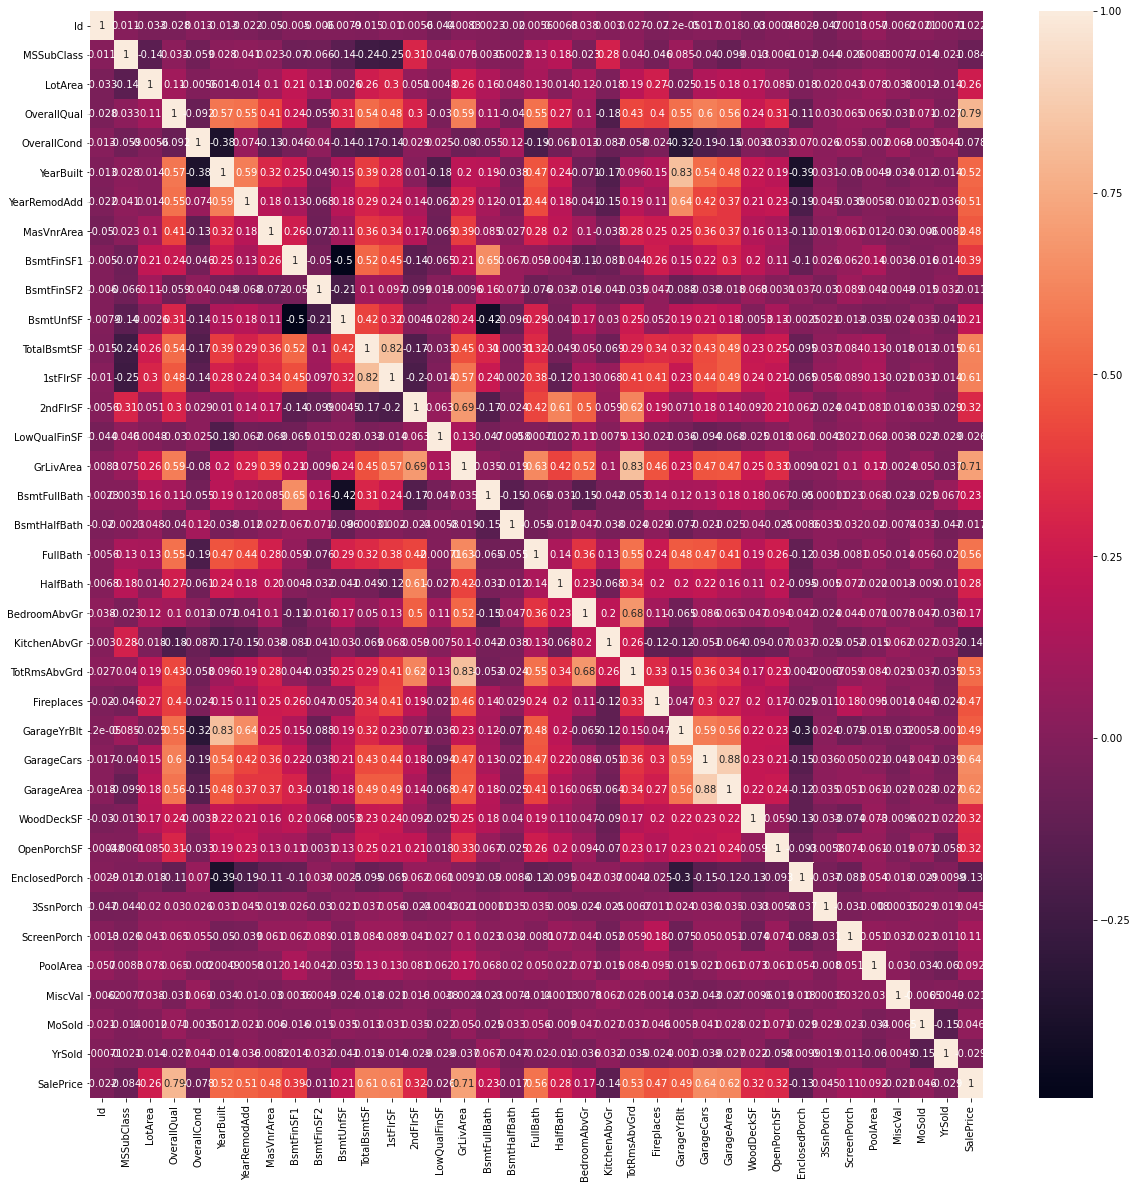

In [9]:
plt.figure(figsize =(20,20))
sb.heatmap(main_df.corr() , annot = True)
plt.show()

In [10]:
main_df.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [15]:
# Getting num of unique values from each category column
cols = main_df.columns
print(cols)
print(len(cols))
for i in range(75):
    if main_df[cols[i]].dtypes == "O":
        print(main_df[cols[i]].nunique())


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [13]:
main_df["Utilities"].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [16]:
main_df = main_df.dropna()
#main_df1 = main_df1.dropna()


In [ ]:
main_df1["Exterior2nd"]

In [17]:
#check nan values
test_null_values_main = pd.DataFrame({
    "Null_Values" : main_df1.isnull().sum(),
    "Percentage" : 100*main_df1.isnull().sum() / main_df1.shape[0],
    "type":main_df1.dtypes
})
test_null_values_main = test_null_values_main.sort_values(by="Percentage", ascending = False).head(27)
test_null_values_main

,Null_Values,Percentage,type
GarageYrBlt,78,5.346127,float64
GarageFinish,78,5.346127,object
GarageQual,78,5.346127,object
GarageCond,78,5.346127,object
GarageType,76,5.209047,object
BsmtCond,45,3.084304,object
BsmtExposure,44,3.015764,object
BsmtQual,44,3.015764,object
BsmtFinType1,42,2.878684,object
BsmtFinType2,42,2.878684,object


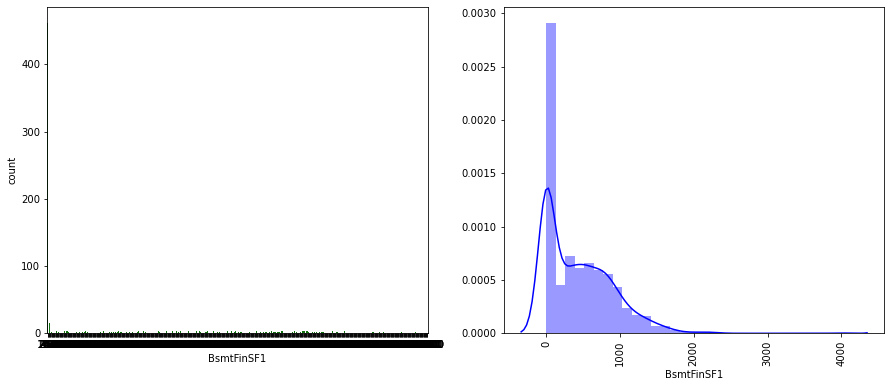

1.1644770954776626


In [18]:
cols = 'BsmtFinSF1'
fig, ax = plt.subplots(1,2,figsize=(15,6),squeeze=False)
sb.countplot(main_df1[cols], ax=ax[0][0], color="green")
sb.distplot(main_df1[cols].dropna(), ax=ax[0][1], color="blue")
plt.xticks(rotation = 90)
plt.show()
print(scipy.stats.skew(main_df1[cols].dropna()))

In [ ]:
main_df1[cols].fillna(value = 4.0, inplace = True)

In [ ]:
## Apply label Encoder on train
le = LabelEncoder()

main_df["Functional"] = le.fit_transform(main_df["Functional"])
main_df["MSZoning"] = le.fit_transform(main_df["MSZoning"])
main_df["Street"] = le.fit_transform(main_df["Street"])
main_df["LotShape"] = le.fit_transform(main_df["LotShape"])
main_df["LandContour"] = le.fit_transform(main_df["LandContour"])
main_df["Utilities"] = le.fit_transform(main_df["Utilities"])
main_df["LotConfig"] = le.fit_transform(main_df["LotConfig"])
main_df["SaleCondition"] = le.fit_transform(main_df["SaleCondition"])
main_df["SaleType"] = le.fit_transform(main_df["SaleType"])
main_df["BsmtQual"] = le.fit_transform(main_df["BsmtQual"])
main_df["GarageType"] = le.fit_transform(main_df["GarageType"])

# apply label encoder on test
le = LabelEncoder()

main_df1["Functional"] = le.fit_transform(main_df1["Functional"])
main_df1["MSZoning"] = le.fit_transform(main_df1["MSZoning"])
main_df1["Street"] = le.fit_transform(main_df1["Street"])
main_df1["LotShape"] = le.fit_transform(main_df1["LotShape"])
main_df1["LandContour"] = le.fit_transform(main_df1["LandContour"])
main_df1["Utilities"] = le.fit_transform(main_df1["Utilities"])
main_df1["LotConfig"] = le.fit_transform(main_df1["LotConfig"])
main_df1["SaleType"] = le.fit_transform(main_df1["SaleType"])
main_df1["SaleCondition"] = le.fit_transform(main_df1["SaleCondition"])
main_df1["BsmtQual"] = le.fit_transform(main_df1["BsmtQual"])
main_df1["GarageType"] = le.fit_transform(main_df1["GarageType"])


In [ ]:
print(main_df.isna().sum().sum())
print(main_df1.isna().sum().sum())


In [ ]:
#create a new feature for live year
main_df["Live_Year"] = 2020 - main_df["YrSold"]
main_df1["Live_Year"] = 2020 - main_df1["YrSold"]


In [ ]:
main_df1.isna().sum().sum()

In [ ]:
main_df.isna().sum().sum()

In [ ]:
main_df.info()
print("\n")
main_df1.info()

In [ ]:
#print all numerical columns
cols = main_df.columns

x = (len(cols))
for i in range(x):
    if main_df[cols[i]].dtypes == "int64" or main_df[cols[i]].dtypes == "int32":
        print([cols[i]])
        
print("\n")

cols = main_df1.columns

x = (len(cols))
for i in range(x):
    if main_df1[cols[i]].dtypes == "int64" or main_df1[cols[i]].dtypes == "int32":
        print([cols[i]])
        
print("\n")

In [ ]:
#create final main_df

main_df = main_df[['Id','MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFinSF1','BsmtFinSF2'
,'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath'
,'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Functional','Fireplaces','GarageCars'
,'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'
,'MoSold','YrSold','SalePrice','Live_Year']]

#create final main_df1

main_df1 = main_df1[['Id','MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFinSF1','BsmtFinSF2'
,'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath'
,'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Functional','Fireplaces','GarageCars'
,'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'
,'MoSold','YrSold','Live_Year']]

main_df

In [ ]:
main_df.corr()

In [ ]:
#checking co-relation greater than 0.50
cols = main_df.columns
print(len(cols))
x = []
for i in range(37):    
    cor =  scipy.stats.pearsonr(main_df["SalePrice"] , main_df.iloc[: , i])[0]
    if cor > 0.50:
        x.append(cols[i])
    
    
print("Columns having co-relation > 0.50 are == " , x)

In [ ]:
# make df with these columns now
main_df = main_df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea','Live_Year','SalePrice']]

main_df1 = main_df1[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea','Live_Year']]
main_df

In [ ]:
main_df.corr()
# now every column > 0.5 (c0-relation)

In [ ]:
main_df1.corr()

In [ ]:
main_df

In [ ]:
# splitting the datasets
x = main_df.drop(["SalePrice"] , axis =1)
y = main_df["SalePrice"]

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.4 , random_state =100)
print(x_train.shape , x_test.shape, y_train.shape , y_test.shape)

In [ ]:
#scaling

ss = StandardScaler()
scaler = ss.fit(x_train)
x_train_label = scaler.transform(x_train)
x_test_label = scaler.transform(x_test)

In [ ]:
x_train_label

In [ ]:
x_test_label

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
#make model

rfr = RandomForestRegressor()
xgb = XGBRegressor()
ada = AdaBoostRegressor()
lr = LinearRegression()
cat = CatBoostRegressor()
dt = DecisionTreeRegressor()
ls = Lasso()
ri = Ridge()

In [ ]:
# train model
print(rfr.fit(x_train_label , y_train))
print(xgb.fit(x_train_label , y_train))
print(ada.fit(x_train_label , y_train))
print(lr.fit(x_train_label , y_train))
print(cat.fit(x_train_label , y_train))
print(dt.fit(x_train_label , y_train))
print(ls.fit(x_train_label , y_train))
print(ri.fit(x_train_label , y_train))



In [ ]:
## predict loss for train  ## rmse(log(pred) , log(true))
print(np.sqrt(mean_squared_error(np.log(rfr.predict(x_train_label)) , np.log(y_train))))
print(np.sqrt(mean_squared_error(np.log(xgb.predict(x_train_label)) , np.log(y_train))))
print(np.sqrt(mean_squared_error(np.log(ada.predict(x_train_label)) , np.log(y_train))))
print(np.sqrt(mean_squared_error(np.log(lr.predict(x_train_label)) , np.log(y_train))))
print(np.sqrt(mean_squared_error(np.log(cat.predict(x_train_label)) , np.log(y_train))))
print(np.sqrt(mean_squared_error(np.log(dt.predict(x_train_label)) , np.log(y_train))))
print(np.sqrt(mean_squared_error(np.log(ls.predict(x_train_label)) , np.log(y_train))))
print(np.sqrt(mean_squared_error(np.log(ri.predict(x_train_label)) , np.log(y_train))))



In [ ]:
## predict loss for test  ## rmse(log(pred) , log(true))
print(np.sqrt(mean_squared_error(np.log(rfr.predict(x_test_label)) , np.log(y_test))))
print(np.sqrt(mean_squared_error(np.log(xgb.predict(x_test_label)) , np.log(y_test))))
print(np.sqrt(mean_squared_error(np.log(ada.predict(x_test_label)) , np.log(y_test))))
#print(np.sqrt(mean_squared_error(np.log(lr.predict(x_test_label)) , np.log(y_test))))
print(np.sqrt(mean_squared_error(np.log(cat.predict(x_test_label)) , np.log(y_test))))
print(np.sqrt(mean_squared_error(np.log(dt.predict(x_test_label)) , np.log(y_test))))
#print(np.sqrt(mean_squared_error(np.log(ls.predict(x_test_label)) , np.log(y_test))))
#print(np.sqrt(mean_squared_error(np.log(ri.predict(x_test_label)) , np.log(y_test))))



In [ ]:
#cross validation 10 folds

print(cross_val_score(rfr , x,y,scoring = "r2" , cv = 10).mean())
print(cross_val_score(xgb , x,y,scoring = "r2" , cv = 10).mean())
print(cross_val_score(ada , x,y,scoring = "r2" , cv = 10).mean())
print(cross_val_score(lr , x,y,scoring = "r2" , cv = 10).mean())
print(cross_val_score(cat , x,y,scoring = "r2" , cv = 10).mean())
print(cross_val_score(dt , x,y,scoring = "r2" , cv = 10).mean())



In [ ]:
## hyper param tuning
rfr_p = {
    'n_estimators': list(range(100,1000)),'max_depth': list(range(1,10)),'min_samples_split': list(range(2,10))
}
xgb_p = {'max_depth': list(range(3,10)),
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'n_estimators': list(range(100,1000))
}
ada_p = {
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'n_estimators': list(range(100,1000))
}
cat_p = {
    'n_estimators' : list(range(200,1000)), 'learning_rate': [0.0232558,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
'max_depth': list(range(3,10)) 
}


In [ ]:
rscv = RandomizedSearchCV(cat , param_distributions=cat_p , cv =10 , n_iter =10 , n_jobs = -1 , verbose =10 )
rscv.fit(x,y)

In [ ]:
rscv.best_params_

In [ ]:
# parameters found after tuning

rfr = RandomForestRegressor(max_depth=9, min_samples_split=4, n_estimators=674)
xgb = XGBRegressor(max_depth=4, n_estimators=441)
ada = AdaBoostRegressor(learning_rate=0.2, n_estimators=211)
cat = CatBoostRegressor(n_estimators=732 , max_depth=5,learning_rate=0.0232558)

In [ ]:
# train model
print(rfr.fit(x_train_label , y_train))
print(xgb.fit(x_train_label , y_train))
print(ada.fit(x_train_label , y_train))
print(lr.fit(x_train_label , y_train))
print(cat.fit(x_train_label , y_train))
print(dt.fit(x_train_label , y_train))
print(ls.fit(x_train_label , y_train))
print(ri.fit(x_train_label , y_train))

In [ ]:
## predict loss for train  ## rmse(log(pred) , log(true))
print(np.sqrt(mean_squared_error(np.log(rfr.predict(x_train_label)) , np.log(y_train))))
print(np.sqrt(mean_squared_error(np.log(xgb.predict(x_train_label)) , np.log(y_train))))
print(np.sqrt(mean_squared_error(np.log(ada.predict(x_train_label)) , np.log(y_train))))
#print(np.sqrt(mean_squared_error(np.log(lr.predict(x_train_label)) , np.log(y_train))))
print(np.sqrt(mean_squared_error(np.log(cat.predict(x_train_label)) , np.log(y_train))))
print(np.sqrt(mean_squared_error(np.log(dt.predict(x_train_label)) , np.log(y_train))))
#print(np.sqrt(mean_squared_error(np.log(ls.predict(x_train_label)) , np.log(y_train))))
#print(np.sqrt(mean_squared_error(np.log(ri.predict(x_train_label)) , np.log(y_train))))

In [ ]:
## predict loss for test  ## rmse(log(pred) , log(true))
print(np.sqrt(mean_squared_error(np.log(rfr.predict(x_test_label)) , np.log(y_test))))
print(np.sqrt(mean_squared_error(np.log(xgb.predict(x_test_label)) , np.log(y_test))))
print(np.sqrt(mean_squared_error(np.log(ada.predict(x_test_label)) , np.log(y_test))))
#print(np.sqrt(mean_squared_error(np.log(lr.predict(x_test_label)) , np.log(y_test))))
print(np.sqrt(mean_squared_error(np.log(cat.predict(x_test_label)) , np.log(y_test))))
print(np.sqrt(mean_squared_error(np.log(dt.predict(x_test_label)) , np.log(y_test))))
#print(np.sqrt(mean_squared_error(np.log(ls.predict(x_test_label)) , np.log(y_test))))
#print(np.sqrt(mean_squared_error(np.log(ri.predict(x_test_label)) , np.log(y_test))))


In [ ]:
# selected cat and xgb and rfr

In [ ]:
main_df1_label = scaler.transform(main_df1)

In [ ]:
main_df1_label

In [ ]:
#prediction 

pred_rfr = rfr.predict(main_df1_label)
pred_xgb = xgb.predict(main_df1_label)
pred_cat = cat.predict(main_df1_label)


In [ ]:
print(pred_rfr.mean())
print(pred_xgb.mean())
print(pred_cat.mean())


In [ ]:
sub

In [ ]:
sub["SalePrice"] = pred_cat
sub.to_csv(path+"\\sub_cat.csv" , index = False)
sub

In [ ]:
Rank - 3547 / 5111
score - 0.15954
algo - catboost

In [20]:
path

'C:\\Users\\MANISH SHARMA\\Desktop\\datasets\\kaggle\\house-prices-advanced-regression-techniques'